# Kaggle, 『House Price Prediction』 회귀 문제 해결하기

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; Kaggle의 『House Price Prediction』는 집에 대한 변수를 통해 집 값을 예측하는 회귀문제이다. Private score 11,000 이하를 목표로 예제를 진행하였다. 이를 해결하기 위해 데이터 분석, 모델 생성, 데이터 전처리, 모델 학습 및 평가 단계를 거쳤다. 데이터는 학습에 사용되는 데이터와 제출에 사용되는 데이터로 구분된다. 또한 독립변수는 20개로 집에 대한 정보이다. 모든 데이터에 대해 결측치는 없었다. 나아가 Pearson 상관분석을 통해 종속 변수와 독립 변수의 의 관계를 알아보고 각 변수에 대한 분석을 진행하였다. 모델은 'GradientBoostingRegressor'와 'LGBMregressor'를 사용하였다. 데이터 전처리 과정에서는  'sqft_lot15' 변수의 제거, 'zipcode' 변수의 순차화, 'Min-Max 정규화', '1KM 내 평균 집 값' 변수 추가를 시행하였다. 그 결과, 'LGBMregressor'모델에서 트리의 개수가 500, 최대 깊이가 5일 때, Private Score 108,556.078를 획득하였다.
</span>

***

<br><br>

## 1. 서론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Kaggle Korea에서 진행한『House Price Prediction』문제를 해결하고자 합니다. 해결 목표는 데이터셋에서 주어지는 집에 대한 독립변수를 통해 종속변수인 집 값을 예측하는 회귀 문제입니다. 본 과정에서는 데이터셋을 우선적으로 분석한 후, 전처리를 진행합니다. 이후, sklearn 라이브러리를 활용하여 모델을 생성, 학습하여 문제를 해결하고자 합니다. 또한, 데이터를 분석하기 위해, 잠깐이나마 최근 주목받고 있는 통계분석툴인 'Jmovi'를 활용하였습니다. 본 과정의 목표는 base-line인 private score 11,000 이하를 달성하는 것 입니다. 다음은 본 과정의 순서를 제시한 것 입니다.
</span>

> _1. 데이터분석_
>
> _2. 모델 생성_
>
> _3. 변수 엔지니어링 및 데이터 전처리를 통한 모델 성능 개선_

***

#### 과정에 필요한 라이브러리 호출

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns   #시각화
import missingno as msno   #결측 상태 시각화
import matplotlib.pyplot as plt   #시각화
from sklearn.metrics import mean_squared_error   #MSE
from sklearn.model_selection import GridSearchCV   #모델 튜닝
from sklearn.model_selection import train_test_split   #split train, test data

#모델================
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
#End=================

pd.options.display.float_format = '{:.3f}'.format

<br><br>

## 2. 데이터 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 바로 주어진 dataset을 활용하여 모델을 학습할 수도 있지만, 데이터를 좀 더 분석하여 '가감'함으로써 성능을 개선할 수 있습니다. 따라서 해당 과정에서는 『House Price Prediction』 데이터셋의 기본적인 사항부터 종속변수인 집 값(Pirce)과 독립변수 간의 관계 파악 등 데이터 분석을 하고자 합니다.
</span>

***

### 2.1 데이터 기본 정보
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 데이터셋은 train과 test로 나누어집니다. test 데이터는 최종 제출 데이터로 정답에 해당하는 집 값이 제외된 독립 변수만으로 이루어져 있습니다. 머신러닝에서 사용하는 test_data의 개념과는 좀 다르니 '제출'의 의미를 담은 'subject_data'로 변수 명을 정하겠습니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; train 데이터는 총 15,035개이고 제출용 데이터는 총 6,468개입니다. train 데이터는 독립변수 + 종속변수, 21개로 구성되어있으며, 제출용 데이터는 독립변수 21개만으로 이루어져 있는 것을 확인할 수 있습니다.
</span>

***

In [2]:
train_data = pd.read_csv("./dataset/data/train.csv")   #학습용 데이터
subject_data = pd.read_csv("./dataset/data/test.csv")   #최종 제출 데이터

print('train data dim : {}'.format(train_data.shape))
print('sub data dim : {}'.format(subject_data.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


<br>

### 2.2 변수 및 결측치 확인
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 구체적으로 어떤 변수로 이루어져 있는지 확인하겠습니다. 동시에 결측치가 존재하진 않는지 파악합니다. 다행히도 train 데이터와 제출 데이터 모두 결측치는 없는 것을 확인할 수 있습니다. 아래는 각 변수의 이름과 결측치를 출력한 것 입니다.
</span>

***

In [3]:
print("coloumn, train_data, target_data")
for c in train_data.columns:
    print('{} : {}'.format(c, len(train_data.loc[pd.isnull(train_data[c]), c].values)), end = ", ")
    try:
        print(len(subject_data.loc[pd.isnull(subject_data[c]), c].values))
    except:
        print("_")

coloumn, train_data, target_data
id : 0, 0
date : 0, 0
price : 0, _
bedrooms : 0, 0
bathrooms : 0, 0
sqft_living : 0, 0
sqft_lot : 0, 0
floors : 0, 0
waterfront : 0, 0
view : 0, 0
condition : 0, 0
grade : 0, 0
sqft_above : 0, 0
sqft_basement : 0, 0
yr_built : 0, 0
yr_renovated : 0, 0
zipcode : 0, 0
lat : 0, 0
long : 0, 0
sqft_living15 : 0, 0
sqft_lot15 : 0, 0


##### *각 변수에 대한 설명
***
+ ID : 집을 구분하는 번호
+ date : 집을 구매한 날짜
+ price : 집의 가격(Target variable)
+ bedrooms : 침실의 수
+ bathrooms : 화장실의 수
+ sqft_living : 주거 공간의 평방 피트(면적)
+ sqft_lot : 부지의 평방 피트(면적)
+ floors : 집의 층 수
+ waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
+ view : 집이 얼마나 좋아 보이는지의 정도
+ condition : 집의 전반적인 상태
+ grade : King County grading 시스템 기준으로 매긴 집의 등급
+ sqft_above : 지하실을 제외한 평방 피트(면적)
+ sqft_basement : 지하실의 평방 피트(면적)
+ yr_built : 지어진 년도
+ yr_renovated : 집을 재건축한 년도
+ zipcode : 우편번호
+ lat : 위도
+ long : 경도
+ sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
+ sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

2019 2nd ML month with KaKR, https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/data
***

<br>

### 2.3 데이터 자료형 확인
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 모든 자료가 결측치 없이 잘 존재하는 것을 확인 하였습니다. 하지만, 한 가지 더 확인해야 할 것이 있습니다. 모델은 '문자열'은 인식할 수 없다는 것입니다. 따라서, 각 변수의 자료형을 확인하여 행여 모델이 인식할 수 없는 변수가 존재하는지 확인하고자 합니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 확인 결과, 대부분의 변수가 정수나 소수로 이루어져있었습니다. 하지만 date의 경우 object 자료형이므로 추후 데이터 전처리 과정에서 적절한 변형을 해줄 필요가 있습니다.
</span>

***

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

<br><br>

### 2.4 변수 별 데이터 정보
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 각 변수의 평균, 표준편차, 최대값, 최소값 등의 정보를 확인합니다. 변수 별로 분포 형태나 크기가 다양하므로 추후 전처리 과정 시, 정규화를 고려해볼 필요가 있습니다.
</span>

***

In [5]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000,15035.000
mean,7517.000,540682.653,3.369,2.115,2083.790,15296.966,1.498,0.007,0.234,3.407,7.661,1794.158,289.632,1971.100,83.799,98078.032,47.561,-122.214,1992.755,12823.885
std,4340.375,371524.660,0.903,0.768,922.134,42612.821,0.539,0.084,0.763,0.647,1.180,831.739,440.663,29.408,400.398,53.298,0.138,0.141,691.456,27736.260
min,0.000,78000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,3758.500,322000.000,3.000,1.750,1430.000,5027.500,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.473,-122.328,1490.000,5100.000
50%,7517.000,450000.000,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,3.000,7.000,1570.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1850.000,7610.000
75%,11275.500,645000.000,4.000,2.500,2560.000,10695.500,2.000,0.000,0.000,4.000,8.000,2230.000,550.000,1997.000,0.000,98117.000,47.678,-122.126,2360.000,10076.000
max,15034.000,7700000.000,10.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4130.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


<br>

### 2.5 변수 간 Pearson 상관관계 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pearson 상관관계 분석을 통해 각 변수 간 통계적으로 유의미한 관계가 있는지 파악합니다. 본 과정에서는 종속 변수인 집 값과 그 외의 독립변수 간의 관계를 파악하는데 이용하고자 합니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Jamovi를 통해 분석한 결과 bathroom, qft_living, view, grade, qft_above, lat, qft_living15는 Price에 대해 0.001 유의수준에서 긍의 상관관계에 있음을 확인하였습니다. 이러한 상관관계 지표는 이후 모델을 학습 시킬 때, 낮은 상관관계의 변수는 제외하는 등의 방법으로 성능 개선을 도모할 수 있습니다. [Fig. 1]은 Jamovi를 활용하여 높은 상관관계에 해당하는 계수가 0.5 이상인 변수의 관계를 시각화한 것입니다.
</span>


<img src="./img/pearson.png" width="600">

[Fig. 1] Pearson 상관관계 분석 시각화
***

#### 파이썬을 활용한 Pearson 상관관계 분석
***
+ 파이썬을 활용하여 Pearson 상관관계를 분석할 수 있지만, 아쉽게도 유의수준은 확인 할 수 없습니다.
***

In [6]:
corr = train_data.corr(method="pearson")["price"]
print(corr)

id               0.021
price            1.000
bedrooms         0.324
bathrooms        0.525
sqft_living      0.703
sqft_lot         0.097
floors           0.263
waterfront       0.266
view             0.401
condition        0.040
grade            0.667
sqft_above       0.609
sqft_basement    0.322
yr_built         0.047
yr_renovated     0.141
zipcode         -0.051
lat              0.302
long             0.024
sqft_living15    0.586
sqft_lot15       0.086
Name: price, dtype: float64


<br>

### 2.6. 변수 분석하기
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 데이터의 기본적인 정보를 분석해 보았습니다. 이후에는 각 변수에 대해 자세히 알아봅니다. 특히, 데이터셋에서 주어지는 위도와 경도를 통해 각 변수를 시각적으로 확인하고자 합니다.
</span>

***

<br>

### 2.6.1. Price
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Price는 집 값으로 종속변수에 해당합니다. &lt;Fig. 2>는 Price 데이터의 분포형태를 보여주는데, 그 형태가 한 쪽으로 치우친 것을 확인할 수 있습니다. 이러한 형태를 '멱함수'라고 하는데, 통계학에서는 주로 log를 씌워 분석을 진행한 후, 다시 복원하는 과정을 거치기도 합니다. 본 예제에서도 모델 학습 시에는 log를 씌워 정규분포 형태로 변환 후, 예측된 결과는 다시 복원하는 과정을 거치고자 합니다. &lt;Fig. 3>는 Price에 log를 씌운 결과의 분표형태를 보여줍니다.
</span>

***

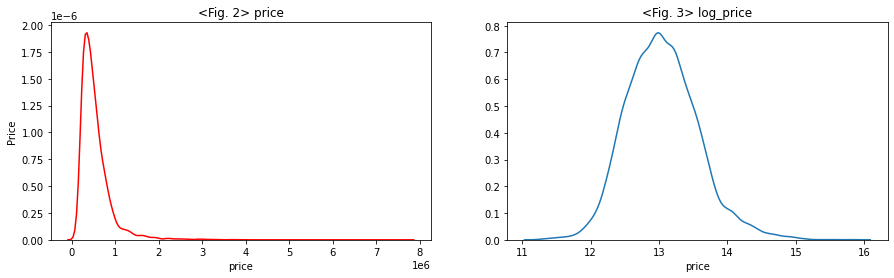

In [7]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.title("<Fig. 2> price")
plt.ylabel("Price")
sns.kdeplot(train_data["price"], color="r")


plt.subplot(1, 2, 2)
plt.title("<Fig. 3> log_price")
plt.ylabel(" ")
sns.kdeplot(np.log1p(train_data["price"]))
plt.show()

<br>

### 2.6.2. lat과 long

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; lat과 long은 latitude와 longitude로 위도와 경도에 해당합니다. 위치는 중요한 인자로 작용할 수 있습니다. 도시와 외곽 지역 그리고 시골의 집 가격이 다를 수 있듯이 집 값을 예측 할 수 있는 좋은 변수로 예상됩니다. &lt;Fig. 4>는 위도와 경도를 토대로 집의 위치를 표시한 것이며, 각 점의 색의 개수는 0에서 3으로 집 값이 높은 순에서 낮은 순에 해당합니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이를 통하여 위치에 따라 집값이 뚜렷하게 구별 되는 것을 확인할 수 있습니다. 특히, 동-서 방향보다 남-북의 방향에서 집 값의 뚜렷한 차이가 확인됩니다. 이러한 사실은 위의 Pearson상관관계에서도 확인할 수 있었습니다. 또한, 집이 존재하지 않는 하얀 부분은 산 또는 강, 바다로 판단 할 수도 있겠습니다.
</span>

***

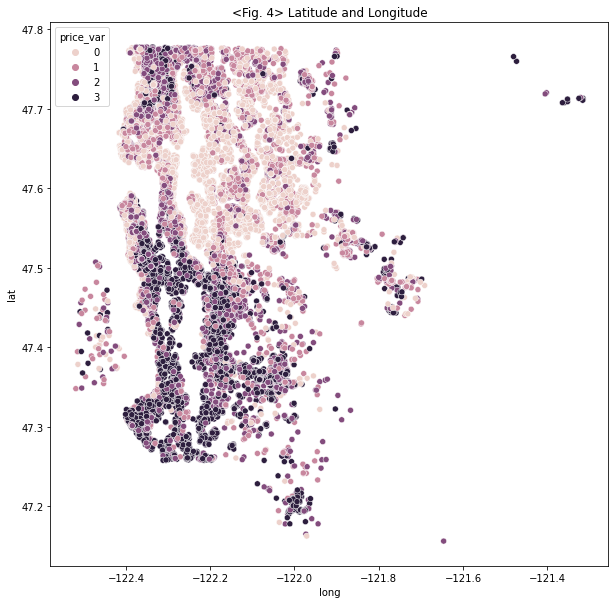

In [8]:
price = train_data["price"].copy()

#범주형==========================
price.loc[price >= 645000] = 0
price.loc[price >= 450000] = 1
price.loc[price >= 322000] = 2
price.loc[price >= 78000] = 3
#End==============================

price = price.astype("int64")

sample = train_data.loc[:, ["lat", "long"]]
sample["price_var"] = price

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("<Fig. 4> Latitude and Longitude")
sns.scatterplot(data=sample, x='long', y='lat', hue="price_var")
plt.show()

<br>

### 2.6.3. Bathrooms

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 화장실의 수를 클래스화 하여, 시각화 하였습니다. 0에서 3으로 갈수록 화장실의 수가 적은 집에 해당합니다. &lt;Fig. 5>는 화장실 수에 대한 집의 위치를 시각화 한 것 입니다. 시각화 결과 특별한 의미를 찾아내지 못하였습니다.
</span>

***

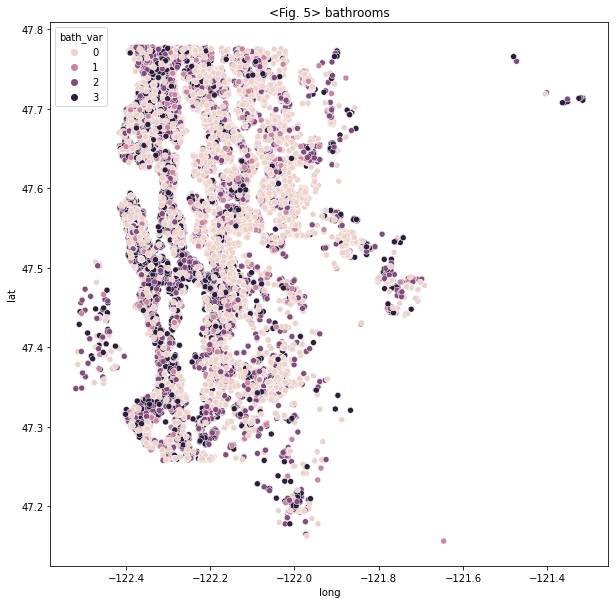

In [9]:
bath = train_data["bathrooms"].copy()

#범주형==========================
bath.loc[bath >= 2.5] = -1
bath.loc[bath >= 2.25] = -2
bath.loc[bath >= 1.75] = -3
bath.loc[bath >= 0] = -4
#End==============================

bath = (bath + 1) * -1
bath = bath.astype("int64")

sample = train_data.loc[:, ["lat", "long"]]
sample["bath_var"] = bath

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("<Fig. 5> bathrooms")
sns.scatterplot(data=sample, x='long', y='lat', hue="bath_var")
plt.show()

<br>

### 2.6.4. Waterfront

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 집 근처에 강 또는 바다가 있는지에 대한 여부입니다. &lt;Fig. 6>는 waterfront에 대한 시각화 결과를 제시한 것 입니다. 확인 결과, 강을 유추할 수 있습니다. 특히 동쪽으로는 집이 드물게 존재하는 것으로 보아 산이 있을 것으로 생각됩니다. 따라서, 동에서 서쪽으로 강이 흐르는 것으로 생각되어 집니다. 또한, 서쪽에 동떨어진 부분이 있는데 해당 부분은 섬으로 유추됩니다.
</span>

***

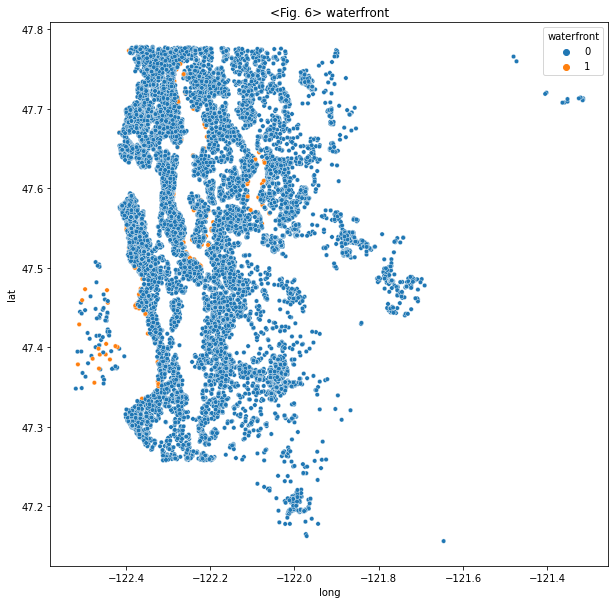

In [10]:
sample = train_data.loc[:, ["lat", "long", "waterfront"]]

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("<Fig. 6> waterfront")
sns.scatterplot(data=sample, x='long', y='lat', hue="waterfront", s=20)
plt.show()

<br>

### 2.6.5. View와 Grade

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 집의 외관에 대한 평가 View와 집의 등급 Grade입니다. 두 변수 모두 높을 수록 좋은 등급에 해당합니다. &lt;Fig. 7>과 &lt;Fig. 8>은 View와 Grade 변수를 시각화 한 것입니다. View가 높은 즉, 외관이 아름다운 집들이 위치한 특징을 보면 주로 강이나 바다로 추측되는 곳에 위하고 있습니다. 아마 호텔이나 별장 같은 장소가 아닐까 생각이 됩니다. Grade가 높은 지역을 보면 대체로 집 값이 높은 북쪽에 위치한 것을 볼 수 있습니다. 두 변수 모두 집 값을 예측하는데 중요한 지표로 작용할 것으로 예상됩니다.
</span>

***

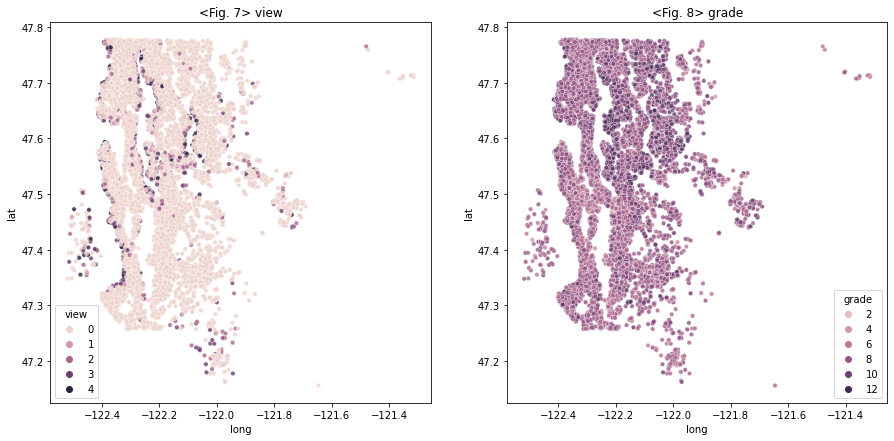

In [11]:
sample = train_data.loc[:, ["lat", "long", "view", "grade"]]


fig, ax = plt.subplots(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("<Fig. 7> view")
sns.scatterplot(data=sample, x='long', y='lat', hue="view", alpha=0.8, s=20)

plt.subplot(1, 2, 2)
plt.title("<Fig. 8> grade")
sns.scatterplot(data=sample, x='long', y='lat', hue="grade", alpha=0.8, s=20)
plt.show()

<br>

### 2.6.6. Renovation
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Renovation은 재건축 연도에 해당하는 변수입니다. &lt;Fig.9>은 재건축 여부에 따른 위치별 시각화를 제시한 것입니다. 혹시 지역개발이 이루어진 곳이 있는지를 살펴보았지만, 지역단위로 재건축이 이루어진 곳은 없었습니다. 또한, &lt;Fig. 10>은 재건축을 한 집과 그렇지 않은 집의 가격을 산점도로 표현한 것입니다. 확인 결과 시각적으로 뚜렷한 차이가 없었습니다.
</span>

***

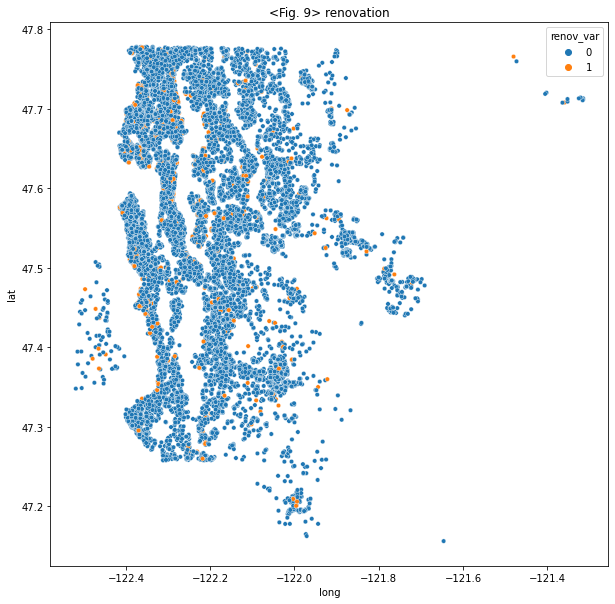

In [12]:
renov = train_data["yr_renovated"].copy()

#범주형==========================
renov.loc[renov != 0] = 1
#End==============================

price = price.astype("int64")

sample = train_data.loc[:, ["lat", "long"]]
sample["renov_var"] = renov


fig, ax = plt.subplots(figsize=(10, 10))
plt.title("<Fig. 9> renovation")
sns.scatterplot(data=sample, x='long', y='lat', hue="renov_var", s=20)
plt.show()

            price  renov_var    idx
0      221900.000          0      0
1      180000.000          0      1
2      510000.000          0      2
3      257500.000          0      3
4      291850.000          0      4
...           ...        ...    ...
15030  610685.000          0  15030
15031 1007500.000          0  15031
15032  360000.000          0  15032
15033  400000.000          0  15033
15034  325000.000          0  15034

[15035 rows x 3 columns]


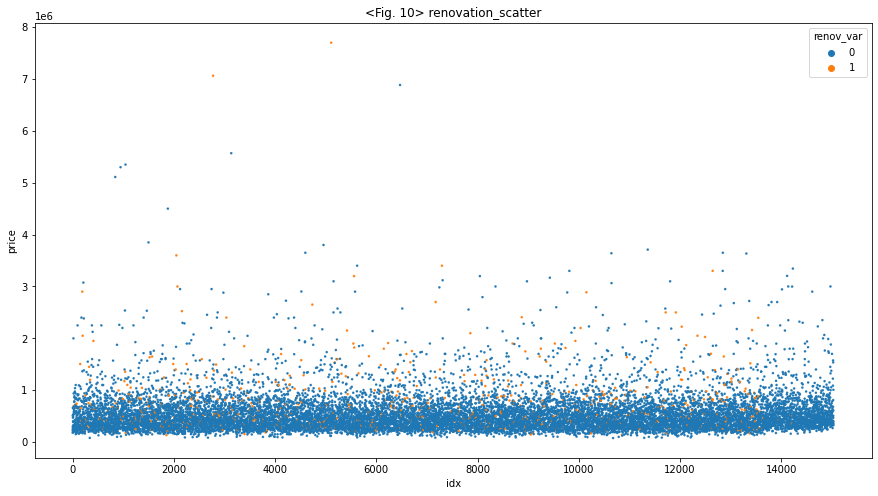

In [13]:
renov = train_data["yr_renovated"].copy()

#범주형==========================
renov.loc[renov != 0] = 1
#End==============================

price = price.astype("int64")

sample = train_data.loc[:, ["price"]]
sample["renov_var"] = renov
# sample = sample.sort_values('price')
sample["idx"] = range(0, len(sample))

print(sample)

fig, ax = plt.subplots(figsize=(15, 8))
plt.title("<Fig. 10> renovation_scatter")
sns.scatterplot(data=sample, x='idx', y='price', hue="renov_var", s=5, edgecolor=None)
plt.show()

<br>

### 2.6.7. zipcode

***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Zipcode는 우편번호에 해당합니다. 우편번호는 지역단위를 구분하는 변수입니다. 이는 집 값을 예측하는데 좋은 변수로 작용합니다. 고려해야할 점은 우편번호가 커질수록 집값이 올라가거나 내려가는 형태가 아니기 때문에, 전처리 과정에서 좀 더 모델이 이해하기 쉽게 만들어 줄 필요가 있습니다.
</span>

***

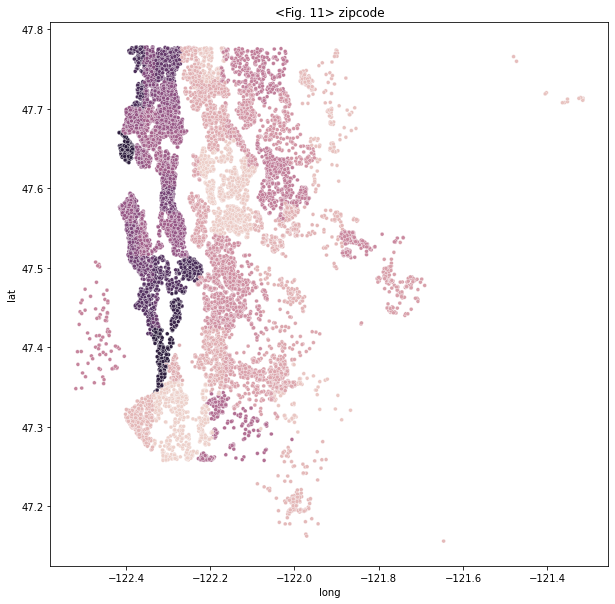

In [14]:
sample = train_data.loc[:, ["lat", "long", "zipcode"]]

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("<Fig. 11> zipcode")
sns.scatterplot(data=sample, x='long', y='lat', hue="zipcode", s=15, legend = False)
plt.show()

<br><br>

## 3. 모델 생성
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 모델을 생성하고 최적의 하이퍼파라미터를 찾는 과정, 예측하는 과정을 간소화 하기 위해 모델을 클래스로 생성하고 사용합니다. 사용하는 모델은 'GradientBoostingRegressor'와 'LGBMRegressor'를 사용합니다. 또한, GridSearchCV를 이용하여 최적의 하이퍼파라미터를 탐색합니다. 최종적으로 모델 학습, 평가 시에는 데이터를 0.2 비율로 validation 데이터를 분리한 후, 일부분은 학습에 사용하고 validation 데이터는 검증 시 사용합니다.
</span><br><br>


+ `get_grid_search()`: 하이퍼파라미터 탐색


+ `get_rmse()`: 모델 학습 및 평가

***

In [6]:
class UniModel:
    def __init__(self, x, y):
        random_state = 2022
        self.x, self.y = x, y
        self.models = [
            GradientBoostingRegressor(random_state=random_state),
            lgb.LGBMRegressor(random_state=random_state)
        ]
        
        
    def get_grid_search(self):
        grid_result = pd.DataFrame(columns=["model", "n_estimators", "max_depth", "RMSLE"])
        param_grid = {
            'n_estimators': [100, 500],   #트리 개수
            'max_depth': [4, 5, 6, 7, 8],   #분류 트리 깊이
        }
        
        for model in self.models:
            print("\n\n", model.__class__.__name__, "*" * 50)
            grid_model = GridSearchCV(
                model, param_grid=param_grid, 
                scoring='neg_mean_squared_error',
                cv=4, verbose=1, n_jobs=8
            )
            try:
                grid_model.fit(self.x, self.y)
            except:
                pass
            
            result = pd.DataFrame(grid_model.cv_results_['params'])
            result['RMSLE'] = np.sqrt(-1 * grid_model.cv_results_['mean_test_score'])
            result["model"] = [model.__class__.__name__] * len(result)
            grid_result = pd.concat([grid_result, result])
            print("*" * 50)
        grid_result = grid_result.sort_values('RMSLE')
        return grid_result
    
    
    def get_rmse(self, model_name, n_estimators, max_depth):
        random_state = 2022
        
        x, val_x, y, val_y = train_test_split(   #데이터 분할
            self.x, self.y, 
            test_size=0.2, 
            random_state=7
        )
        
        if model_name == "GB":
            model = radientBoostingRegressor(
                random_state=random_state,
                n_estimators=n_estimators,
                max_depth=max_depth
            )
        elif model_name == "XGB":
            model = xgb.XGBRegressor(
                random_state=random_state,
                n_estimators=n_estimators,
                max_depth=max_depth
            )
        else:
            model = lgb.LGBMRegressor(
                random_state=random_state,
                n_estimators=n_estimators,
                max_depth=max_depth
            )
        model.fit(x, y)
        predict = model.predict(val_x)
        
        mse = mean_squared_error(
            np.expm1(predict), np.expm1(val_y)
        )
        return [np.sqrt(mse), model]

<br><br>

## 4. 학습 데이터 정제 및 모델 선택
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 이제 위에서 분석한 정보를 토대로 데이터를 전처리하여 모델의 성능을 개선하고자 합니다. 데이터의 별다른 전처리 없이 모델을 학습 했을 때의 점수는 Private Score 기준으로 113,142.325입니다. 본 과정의 목표는 데이터 전처리와 최적의 하이퍼파라미터 탐색을 통해 Private Score 110,000 이하를 달성하는 것입니다.
</span>

***

### 4.1. Base-Line
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 특별한 데이터 전처리 없이 바로 모델을 학습하였을 때 얻은 성능을 기준(base-line)으로 삼고자 합니다. [그림 2]는 특별한 전처리 없이 학습한 모델의 Private Score와 Public Score를 보여줍니다. Id의 경우 변수로 작용하는 것이 아니기 때문에 제외했으며, Date의 경우 문자열에 해당하기 때문에 년도와 월을 제외한 부분은 제거하였습니다.
</span><br><br>

<img src="./img/base_line.jpg" width="800">


[그림 2] base-line Private Scroe

***

#### 데이터 정제 단계
***
+ id는 제거하고 date는 년과 월만 사용
+ ex) 2021.10.19 ==> 2110
***

In [16]:
x = train_data.drop(["id", "price", "date"], axis=1)   #date, price 제외
x["date"] = train_data["date"].map(lambda x: int(x[:8]))   #date 추가
y = train_data["price"]
y = np.log1p(y)

<br>

#### 최적 하이퍼파라미터 검색
***
+ 위에서 생성한 UniModel 클래스를 이용하여 최적의 하이퍼파라미터를 탐색한다.
+ 모델은 LGBMRegressor, 트리 개수는 500, 깊이는 5일 때 최적의 성능을 제시한다.
+ cpu 다중 사용으로인한 메세지가 출력된다.
***

In [17]:
uni_model = UniModel(x, y)
grid_search_result = uni_model.get_grid_search()
print(grid_search_result)



 GradientBoostingRegressor **************************************************
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:  5.3min finished


**************************************************


 LGBMRegressor **************************************************
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:   16.2s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
**************************************************
                       model n_estimators max_depth  RMSLE
9              LGBMRegressor          500         8  0.163
5              LGBMRegressor          500         6  0.163
1              LGBMRegressor          500         4  0.163
7              LGBMRegressor          500         7  0.163
3              LGBMRegressor          500         5  0.163
1  GradientBoostingRegressor          500         4  0.164
3  GradientBoostingRegressor          500         5  0.164
5  GradientBoostingRegressor          500         6  0.164
8              LGBMRegressor          100         8  0.165
6              LGBMRegressor          100         7  0.165
4              LGBMRegressor          100         6  0.167
4  GradientBoostingRegressor          100         6  0.167
7  GradientBoostingRegressor          500         7 

<br>

#### 모델 검증하기
***
+ 모델은 LGBMRegressor, 트리 개수는 500, 깊이는 5일 때, validation data에 대해 110,581.071의 손실 값을 얻었다.
+ 실제 subject data에 대한 private score가 약 113,000이었음을 감안하면 어느정도 오차가 존재함을 알 수 있다.
***

In [18]:
uni_model = UniModel(x, y)
model_name, n_est, max_depth = "LGB", 500, 5

mse, model = uni_model.get_rmse(model_name=model_name, n_estimators=n_est, max_depth=max_depth)

print("\n\n" + "*" * 50)
print("model:", model_name)
print("n_estimators:", n_est)
print("max_depth:", max_depth)
print("MSE:", mse)
print("*" * 50)



**************************************************
model: LGB
n_estimators: 500
max_depth: 5
MSE: 110581.07090317096
**************************************************


<br>

### 4.2 sqft_lot15 변수
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; sqft_lot15는 2015년 기준 부지의 평방 피트로 재건축 시에는 sqft_lot 변수와 값이 다를 것 입니다. 앞서, 데이터 분석 단계에서 Pearson 상관관계 분석을 통해 각 변수와 집 값의 관계를 알아보았습니다. sqft_lot15은 0.086으로 유의미한 관계가 없음을 확인하였습니다. 따라서 sqft_lot15 변수를 학습 데이터에서 제외하고자 합니다.
</span>

***

In [ ]:
#sqft_lot15================
data = data.drop(["sqft_lot15"], axis=1)
#End=======================

<br>

### 4.3 zipcode 변수
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; zipcode는 범주형 데이터에 속합니다. zipcode가 낮은 값에서 점점 높은 값이 된다고 하여 집 값이 높아지거나 하지 않습니다. 따라서 본 과정에서는 zipcode 범주형 데이터에서 순차적인 데이터로 바꿔주고자 합니다. 집 값에 따라 zipcode를 정렬한 후 집 값이 낮은 지역(zipcode의 지역)순으로 0부터 클래스화 합니다. 이러한 처리를 통해 zipcode 클래스가 높아질 수록 집 값도 함께 높아지게 됩니다. 이는 기존에 비선형이었던 문제를 선형으로 바꿈으로써 모델이 쉽게 학습할 수 있게 해줍니다.
</span>

***

In [ ]:
#zipcode 범주화============
zip_table = train_data["price"].groupby(train_data["zipcode"]).mean().sort_values().index.tolist()
data["zipcode"] = data["zipcode"].map(lambda x: zip_table.index(x))
#End=======================

<br>

### 4.4 Min-Max 정규화
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 각 변수는 평균과 분산이 모두 다릅니다. 따라서, 각 변수에 따라 Min-Max 정규화를 시행하여 모델의 학습이 잘 이루어 질 수 있도록 해줍니다.
</span>

***

In [ ]:
#정규화====================
new_data = {}
for col_name, values in data.iteritems():
    min_, max_ = values.min(), values.max()
    new_data[col_name] = ((values - max_) / (min_ - max_))
data = pd.DataFrame(new_data)
#End=======================

<br>

### 4.5 1KM 내의 평균 집 값
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 경도와 위도를 토대로 해당 집의 1KM 내에 있는 집 값의 평균을 구하여 새로운 변수로 사용합니다. [그림 3]은 1KM 내의 평균 집 값을 구하는 방법을 도식화 한 것 입니다. 우리는 앞서, 집 값이 지역별로 대부분 비슷한 것을 확인하였습니다. 이러한 배경을 바탕으로 각 집의 1KM 내의 집들의 가격을 평균하여 해당 집의 가격을 유추하는 데에 사용할 수 있습니다.
</span><br><br>

<img src="./img/km_avg.png" width="700">

[그림 3] 1KM내의 평균 집 값 도식화
***

In [ ]:
#1km=======================
KMRATE, KM = (1/ 111), 1
km_table = train_data.loc[:, ["price", "lat", "long"]]
bound_data = data.loc[:, ["lat", "long"]]

km1_bound = []
for idx, row in bound_data.iterrows():
    up, down = row["lat"] + KMRATE * KM, row["lat"] - KMRATE * KM
    left, right = row["long"] - KMRATE * KM, row["long"] + KMRATE * KM
    
    is_up = km_table["lat"] <= up
    is_down = km_table["lat"] >= down
    is_left = km_table["long"] >= left
    is_right = km_table["long"] >= right
    mean_ = km_table[is_up & is_down & is_left & is_right]["price"].mean()
    km1_bound += [mean_]
data["km1_bound"] = km1_bound
#End=======================

<br>

### 4.6 통합 및 테스트
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 'sqft_lot15' 변수의 제거, 'zipcode' 변수의 순차화, 'Min-Max 정규화', '1KM 내 평균 집 값' 변수 추가를 시행하여 모델을 학습, 평가합니다. 그 결과, 본 과정의 목표인 Private Score 11,000 미만인, 108,556.078을 달성하였습니다. 또한, 테스트 과정 중 얻은 최저 Public Score는 106,637.135 입니다. 또한, 모델은 LGBMRegressor을 사용하였으며, 트리의 개수는 500개, 최대 깊이는 5로 설정하였습니다. [그림 4]는 전처리와 하이퍼파라미터 튜닝을 통해 획득한 Private Score와 Public Score를 제시한 것 입니다.
</span><br><br>


<img src="./img/public.jpg" width="800">
<img src="./img/all.jpg" width="800">

[그림 4] 전처리 및 하이퍼파라미터 튜닝을 통한 Private & Public Score

***

#### 데이터 정제 단계
***
+ 앞선, 모든 전처리 과정을 통합하였다.
***

In [4]:
#기본 정제단계=============
y = train_data["price"]
y = np.log1p(y)

train_len = len(y)
train_x = train_data.drop(["price"], axis=1).copy()   #price 제외
sub_x = subject_data.copy()

data = pd.concat((train_x, sub_x))
#End=======================


#date======================
data = data.drop(["id"], axis=1)   #date, price 제외
data["date"] = data["date"].map(lambda x: int(x[2:6]))   #date 추가
#End=======================


#sqft_lot15================
data = data.drop(["sqft_lot15"], axis=1)
#End=======================


#zipcode 범주화============
zip_table = train_data["price"].groupby(train_data["zipcode"]).mean().sort_values().index.tolist()
data["zipcode"] = data["zipcode"].map(lambda x: zip_table.index(x))
#End=======================


#1km=======================
KMRATE, KM = (1/ 111), 1
km_table = train_data.loc[:, ["price", "lat", "long"]]
bound_data = data.loc[:, ["lat", "long"]]

km1_bound = []
for idx, row in bound_data.iterrows():
    up, down = row["lat"] + KMRATE * KM, row["lat"] - KMRATE * KM
    left, right = row["long"] - KMRATE * KM, row["long"] + KMRATE * KM
    
    is_up = km_table["lat"] <= up
    is_down = km_table["lat"] >= down
    is_left = km_table["long"] >= left
    is_right = km_table["long"] >= right
    mean_ = km_table[is_up & is_down & is_left & is_right]["price"].mean()
    km1_bound += [mean_]
data["km1_bound"] = km1_bound
#End=======================


#정규화====================
new_data = {}
for col_name, values in data.iteritems():
    min_, max_ = values.min(), values.max()
    new_data[col_name] = ((values - max_) / (min_ - max_))
data = pd.DataFrame(new_data)
#End=======================


#분리======================
train_x = data[:train_len]
sub_x = data[train_len:]
#End=======================

<br>

#### 최적 하이퍼파라미터 검색
***
+ 트리 개수는 500, 깊이는 4일 때 최적의 성능을 제시한다.
+ cpu 다중 사용으로인한 메세지가 출력된다.
***

In [7]:
uni_model = UniModel(train_x, y)
grid_search_result = uni_model.get_grid_search()
print(grid_search_result)



 LGBMRegressor **************************************************
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:   16.0s finished


**************************************************
           model n_estimators max_depth  RMSLE
1  LGBMRegressor          500         4  0.161
5  LGBMRegressor          500         6  0.161
3  LGBMRegressor          500         5  0.162
9  LGBMRegressor          500         8  0.162
7  LGBMRegressor          500         7  0.163
8  LGBMRegressor          100         8  0.164
4  LGBMRegressor          100         6  0.164
6  LGBMRegressor          100         7  0.164
2  LGBMRegressor          100         5  0.166
0  LGBMRegressor          100         4  0.169


<br>

#### 모델 검증하기
***
+ 모델은 LGBMRegressor, 트리 개수는 500, 깊이는 4일 때, validation data에 대해 105,079.669의 손실 값을 얻었다.
***

In [18]:
uni_model = UniModel(train_x, y)
model_name, n_est, max_depth = "LGB", 500, 4

mse, model = uni_model.get_rmse(model_name=model_name, n_estimators=n_est, max_depth=max_depth)

print("\n\n" + "*" * 50)
print("model:", model_name)
print("n_estimators:", n_est)
print("max_depth:", max_depth)
print("MSE:", mse)
print("*" * 50)



**************************************************
model: LGB
n_estimators: 500
max_depth: 4
MSE: 105079.66888749273
**************************************************


<br>

#### 예측 저장하기
***
+ 최종 모델을 이용하여 subject 데이터에 대해 집 값을 예측한 후, 이를 제출 양식에 맞게 csv 파일로 생성한다.
***

In [110]:
predict = np.expm1(model.predict(sub_x))
sub_id = subject_data["id"]

test = pd.DataFrame(zip(sub_id, predict), columns=["id", "price"])
test.to_csv("./result_csv/result.csv", index=False, mode="w")
print("DONE...")

DONE


<br><br>

## 5. 결론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 본 과정에서는 Kaggle의 『House Price Prediction』 회귀 문제의 Private Score 110,000 이하로 달성하는 것을 목표로 하여 예제를 진행하였습니다. 이를 해결하기 위해 데이터 분석, 모델 생성, 데이터 및 하이퍼파라미터 튜닝을 통한 성능 개선 순으로 전개하였습니다. 데이터 분석을 통해 데이터를 위도와 경도를 토대로 시각적으로 이해 하였습니다. 이러한 분석을 바탕으로 집 값은 위치에 따라 비슷하다는 특징을 파악할 수 있었으며, 1KM 내의 집 값 평균을 새로운 변수로 활용 하였습니다. 이는 모델 학습 및 평가 이전에 데이터를 분석하는 것이 중요하다는 것을 시사하는 바입니다. 또한, 최적의 파라미터를 찾기 위하여 직접 시행착오를 하지 않고 GridSearchCV를 이용하였습니다. 하지만 GridSearchCV가 제시한 것이 항상 최고의 성능을 제시하진 못하였기에, 어느정도의 지표로 활용하여 해당 범위 내에서 분석자가 직접 하이퍼파라미터를 조금씩 조절할 필요가 있겠습니다.
</span>

***

#### 형상기록 관리
***
+ v1_1: 초기모델


+ v2_1: 독립변수 채택 및 데이터 정제


+ v3_1: 마크다운 및 내용 추가
***

##### 회고
***
이번 예제의 목표였던, Private Score의 110,000 이하를 달성하는 데에 가장 큰 역할을 했던 것은 '1KM 내 집 값의 평균'을 변수로 사용하는 것 이었다. 그도 그럴 것이, 주변의 집 값은 비슷할테니 집 값을 예측하는 데에 꽤나 좋은 지표로 작용하는 것으로 보인다. 이러한 변수를 사용한 것도 중요하지만, 이러한 변수를 생각할 수 있게 해준 계기도 무척 중요하다고 생각한다. 그리고 이러한 시각을 가지게 해준 것은 데이터 분석 단계 이다. 데이터를 위도와 경도를 바탕으로 위치시켜 시각화 한 것을 보면서 좀 더 좋은 방안을 생각하다보니 떠오른 아이디어 였다.
***